In [350]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [351]:
womens_stats = pd.read_csv('wbb_stats.csv')

In [352]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                         object
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [353]:
womens_stats = womens_stats.replace(to_replace = ['Win','Loss'],value = ['1','0'])

In [354]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                         object
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [355]:
womens_stats['Win_Or_Loss'] = womens_stats['Win_Or_Loss'].astype(str).astype(int)

In [356]:
womens_stats.dtypes

Game_ID                              int64
Date_Of_Game                        object
Team_1                              object
Team_2                              object
Win_Or_Loss                          int32
Half_Points                          int64
Points_Scored                        int64
First_Half_FGA                       int64
First_Half_FGM                       int64
First_Half_Assists                   int64
First_Half_Offensive_Rebounds        int64
First_Half_Turnovers                 int64
First_Half_FTA                       int64
First_Half_FTM                       int64
First_Half_Assist_Ratio            float64
First_Half_Offensive_Efficiency    float64
FGA                                  int64
FGM                                  int64
Three_Point_Attempts                 int64
Three_Point_Makes                    int64
Assists                              int64
Offensive_Rebounds                   int64
Turnovers                            int64
FTA        

In [357]:
womens_stats_num = womens_stats.drop(columns = {'Date_Of_Game', 'Team_1', 'Team_2'})

In [358]:
womens_stats_num_without_game_id = womens_stats_num.drop(columns = {'Game_ID'})

In [359]:
womens_stats_num_without_game_id_corr = womens_stats_num_without_game_id.corr()

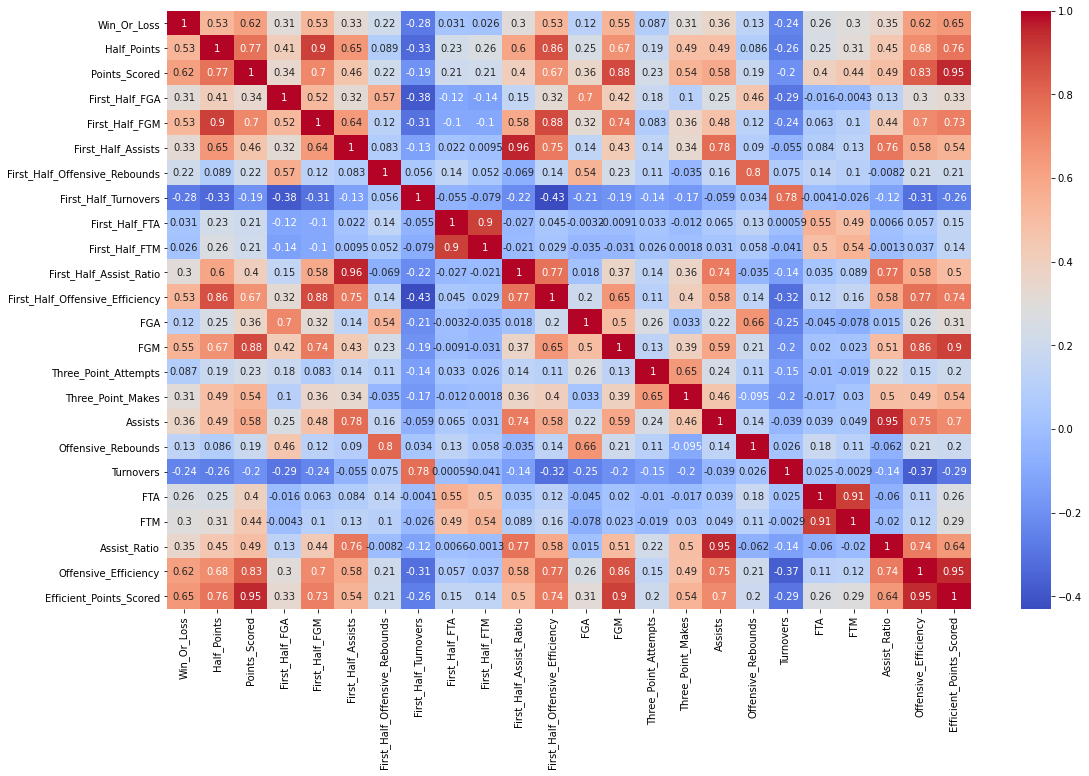

In [360]:
plt.figure(figsize=(18,11))
sns.heatmap(womens_stats_num_without_game_id_corr, annot = True, cmap = "coolwarm");

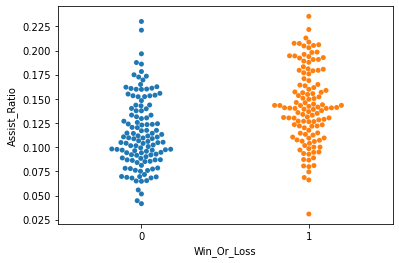

In [558]:
sns.swarmplot(x = womens_stats.Win_Or_Loss, y = womens_stats.Assist_Ratio);

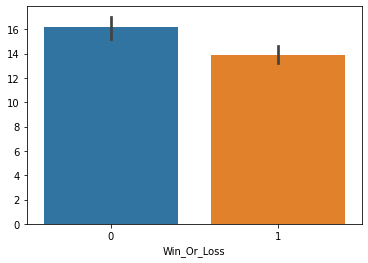

In [572]:
sns.barplot( x = womens_stats.Win_Or_Loss, y = womens_stats[['Turnovers']].mean(axis = 1));

In [361]:
womens_stats.Team_1.unique()

array(['St. Scholastica', 'UWEC', 'Bethel', 'Simpson', 'Wartburg',
       'Carleton', 'Loras', 'St. Norbert', 'St. Catherine',
       'Framingham St.', 'Salve Regina', 'UWW', 'UWS', 'UWP', 'UWO',
       'UWSP', 'UWRF', 'UWL', 'Superior', 'Calvin', "St. Mary's",
       'St. Thomas', 'Augustana', 'DePauw', 'Ohio Northern', 'Alma',
       'Lawrence', 'Pacific Lutheran', 'Puget Sound', 'Ripon', 'Edgewood',
       'Bethany Lutheran', 'Carroll', 'Coe', 'Cornell', 'Luther',
       'Finlandia', 'Lake Forest', 'Viterbo', 'Washington',
       'Illinois Wesleyan', 'Northwestern', 'Dubuque', 'Salisbury',
       'Husson', 'North Central'], dtype=object)

In [362]:
womens_stats['Team_1_ID'] = womens_stats.groupby(['Team_1']).ngroup()

In [363]:
game = womens_stats.merge(womens_stats, how='outer', on='Game_ID')
game = game.loc[game.Win_Or_Loss_x != game.Win_Or_Loss_y]

In [364]:
game = game.drop_duplicates(['Game_ID'])
game = game.reset_index(drop = True)
game

,Game_ID,Date_Of_Game_x,Team_1_x,Team_2_x,Win_Or_Loss_x,Half_Points_x,Points_Scored_x,First_Half_FGA_x,First_Half_FGM_x,First_Half_Assists_x,First_Half_Offensive_Rebounds_x,First_Half_Turnovers_x,First_Half_FTA_x,First_Half_FTM_x,First_Half_Assist_Ratio_x,First_Half_Offensive_Efficiency_x,FGA_x,FGM_x,Three_Point_Attempts_x,Three_Point_Makes_x,Assists_x,Offensive_Rebounds_x,Turnovers_x,FTA_x,FTM_x,Assist_Ratio_x,Offensive_Efficiency_x,Efficient_Points_Scored_x,Team_1_ID_x,Date_Of_Game_y,Team_1_y,Team_2_y,Win_Or_Loss_y,Half_Points_y,Points_Scored_y,First_Half_FGA_y,First_Half_FGM_y,First_Half_Assists_y,First_Half_Offensive_Rebounds_y,First_Half_Turnovers_y,First_Half_FTA_y,First_Half_FTM_y,First_Half_Assist_Ratio_y,First_Half_Offensive_Efficiency_y,FGA_y,FGM_y,Three_Point_Attempts_y,Three_Point_Makes_y,Assists_y,Offensive_Rebounds_y,Turnovers_y,FTA_y,FTM_y,Assist_Ratio_y,Offensive_Efficiency_y,Efficient_Points_Scored_y,Team_1_ID_y
0,1,11/8/2019,St. Scholastica,UWEC,0,11,33,26,3,0,0,8,4,4,0.000000,0.088235,54,9,18,3,3,8,16,16,12,0.041644,0.184615,6.092308,32,11/8/2019,UWEC,St. Scholastica,1,34,71,40,13,8,15,7,10,6,0.134680,0.525000,69,28,20,6,20,21,16,13,9,0.180636,0.571429,40.571429,35
1,2,11/12/2019,Bethel,UWEC,1,43,77,32,15,10,5,4,16,10,0.188537,0.609756,62,26,24,7,14,12,17,27,18,0.140168,0.493827,38.024691,3,11/12/2019,UWEC,Bethel,0,30,54,23,9,2,3,17,12,10,0.042301,0.282051,46,19,12,2,4,5,32,17,14,0.044703,0.298701,16.129870,35
2,3,11/15/2019,UWEC,Simpson,0,35,63,33,13,11,2,7,12,9,0.195451,0.489796,59,23,20,4,20,4,15,17,13,0.221043,0.477778,30.100000,35,11/15/2019,Simpson,UWEC,1,44,84,33,15,11,3,7,11,8,0.196991,0.541667,56,28,28,13,20,8,18,21,15,0.193723,0.558140,46.883721,28
3,4,11/16/2019,UWEC,Wartburg,0,31,54,29,12,5,2,4,4,3,0.125755,0.472222,54,21,28,8,12,6,11,6,4,0.160772,0.464789,25.098592,35,11/16/2019,Wartburg,UWEC,1,35,69,28,11,7,2,7,9,7,0.152306,0.450000,52,23,28,8,12,5,12,20,15,0.141509,0.492958,34.014085,44
4,5,11/20/2019,Carleton,UWEC,0,29,50,27,11,6,3,6,5,5,0.145631,0.472222,55,20,21,4,9,5,11,6,6,0.125628,0.414286,20.714286,5,11/20/2019,UWEC,Carleton,1,41,75,29,15,8,4,3,6,5,0.187617,0.638889,61,29,21,9,18,13,8,11,8,0.195993,0.635135,47.635135,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,2/19/2021,UWL,UWS,1,33,75,26,12,8,4,13,5,5,0.162602,0.465116,51,22,18,6,11,12,20,32,25,0.114488,0.471429,35.357143,36,2/19/2021,UWS,UWL,0,31,61,32,12,6,8,10,6,4,0.118483,0.450000,65,22,20,4,10,20,18,22,13,0.097390,0.438356,26.739726,40
117,118,2/24/2021,UWL,UWP,0,30,58,25,11,4,1,5,9,5,0.105374,0.454545,58,21,14,6,8,10,9,17,10,0.096993,0.446154,25.876923,36,2/24/2021,UWP,UWL,1,36,68,29,14,9,4,7,5,3,0.190678,0.560976,55,25,20,8,12,6,13,12,10,0.140713,0.500000,34.000000,38
118,119,2/26/2021,UWP,UWL,0,27,48,23,8,6,3,8,8,8,0.148075,0.411765,51,16,16,3,7,7,13,15,13,0.090206,0.359375,17.250000,38,2/26/2021,UWL,UWP,1,32,69,25,12,5,8,11,9,6,0.111210,0.515152,55,25,11,4,12,17,16,19,15,0.131349,0.560606,38.681818,36
119,120,3/1/2021,UWSP,UWL,0,22,53,24,8,3,2,8,4,4,0.081610,0.333333,56,20,17,3,7,10,10,13,10,0.088923,0.428571,22.714286,41,3/1/2021,UWL,UWSP,1,30,59,31,11,7,4,4,4,4,0.159963,0.473684,62,21,14,6,13,14,7,16,11,0.146002,0.500000,29.500000,36


In [365]:
game.dtypes

Game_ID                                int64
Date_Of_Game_x                        object
Team_1_x                              object
Team_2_x                              object
Win_Or_Loss_x                          int32
Half_Points_x                          int64
Points_Scored_x                        int64
First_Half_FGA_x                       int64
First_Half_FGM_x                       int64
First_Half_Assists_x                   int64
First_Half_Offensive_Rebounds_x        int64
First_Half_Turnovers_x                 int64
First_Half_FTA_x                       int64
First_Half_FTM_x                       int64
First_Half_Assist_Ratio_x            float64
First_Half_Offensive_Efficiency_x    float64
FGA_x                                  int64
FGM_x                                  int64
Three_Point_Attempts_x                 int64
Three_Point_Makes_x                    int64
Assists_x                              int64
Offensive_Rebounds_x                   int64
Turnovers_

In [284]:
game = game.rename(columns = {'Date_Of_Game_x': 'Date_Of_Game', 'Team_1_x': 'Team_x', 'Team_2_x' : 'Team_y', 'Team_1_ID_x': 'Team_x_ID', 'Team_1_ID_y': 'Team_y_ID'})
game = game.drop(columns = {'Team_1_y', 'Team_2_y', 'Date_Of_Game_y'})

In [285]:
game.dtypes

Game_ID                                int64
Date_Of_Game                          object
Team_x                                object
Team_y                                object
Win_Or_Loss_x                          int32
Half_Points_x                          int64
Points_Scored_x                        int64
First_Half_FGA_x                       int64
First_Half_FGM_x                       int64
First_Half_Assists_x                   int64
First_Half_Offensive_Rebounds_x        int64
First_Half_Turnovers_x                 int64
First_Half_FTA_x                       int64
First_Half_FTM_x                       int64
First_Half_Assist_Ratio_x            float64
First_Half_Offensive_Efficiency_x    float64
FGA_x                                  int64
FGM_x                                  int64
Three_Point_Attempts_x                 int64
Three_Point_Makes_x                    int64
Assists_x                              int64
Offensive_Rebounds_x                   int64
Turnovers_

In [286]:
game_num = game.drop(columns = {'Game_ID', 'Date_Of_Game', 'Team_x', 'Team_y', 'Team_x_ID', 'Team_y_ID'})

In [287]:
game_num_corr = game_num.corr().abs()
sorted_mat = pd.DataFrame(game_num_corr.unstack().sort_values(ascending = False).drop_duplicates())

In [288]:
highest_correlations = sorted_mat[sorted_mat[0] > 0.7]

In [289]:
highest_correlations

,,0
Win_Or_Loss_y,Win_Or_Loss_x,1.000000
Offensive_Efficiency_y,Offensive_Efficiency_y,1.000000
First_Half_Assists_x,First_Half_Assist_Ratio_x,0.965200
Assist_Ratio_y,Assists_y,0.959704
First_Half_Assist_Ratio_y,First_Half_Assists_y,0.955861
...,...,...
Efficient_Points_Scored_y,Half_Points_y,0.714356
First_Half_FGA_x,FGA_x,0.711171
Assist_Ratio_y,Efficient_Points_Scored_y,0.706811
FGM_x,First_Half_Offensive_Efficiency_x,0.704846


In [494]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [495]:
# Win or loss machine learning classifier
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})

In [496]:
X = features
X
y = game_num['Win_Or_Loss_x']

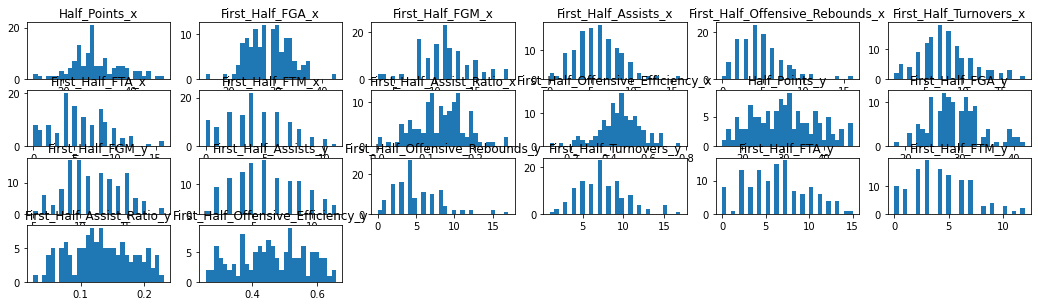

In [497]:
cols = list(X)
fig = plt.figure(figsize=(18, 11))
fig.tight_layout(pad=5.0)
for i in range(len(cols)):
    plt.subplot(9, 6, i+1)
    plt.hist(X[cols[i]], bins=30)
    plt.title(cols[i])

In [498]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )

In [499]:
from sklearn.metrics import accuracy_score
log = LogisticRegression(max_iter = 1000)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
log_acc = accuracy_score(y_test, y_pred)

In [500]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred)

In [501]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred)

In [502]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)

In [503]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)

In [504]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)

[10:22:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [505]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(normalized_X, y_train)
y_pred = clf.predict(X_test)
clf_acc = accuracy_score(y_test, y_pred)

In [506]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = "log", max_iter=500)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
sgd_acc = accuracy_score(y_test, y_pred)

In [507]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier (estimators = [('sgd', sgd), ('clf', clf), ('log', log), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'hard')
voting_clf_hard.fit(X_train, y_train)
y_pred = voting_clf_hard.predict(X_test)
voting_clf_hard_acc = accuracy_score(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[10:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [508]:
from sklearn.ensemble import VotingClassifier
voting_clf_soft = VotingClassifier (estimators = [('sgd', sgd), ('clf', clf), ('log', log), ('dt', dt), ('knn', knn), ('rf', rf), ('svc', svc), ('xgb', xgb)], voting = 'soft')
voting_clf_soft.fit(X_train, y_train)
y_pred = voting_clf_soft.predict(X_test)
voting_clf_soft_acc = accuracy_score(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[10:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [509]:
# Putting all into one dataframe to compare
accuracy_data_frame = [log_acc, dt_acc, knn_acc, rf_acc, svc_acc, xgb_acc, clf_acc, sgd_acc, voting_clf_hard_acc, voting_clf_soft_acc]
accuracy_data_frame = pd.DataFrame(accuracy_data_frame)

In [510]:
# Win or loss prediction accuracy
accuracy_data_frame.rename(index = {0: "Logistic Regression", 1: "Decision Tree", 2: "K-Nearest Neighbor", 3: "Random Forest",4: "SVC", 5: "XGB", 6: "Naive Bayes", 7: "SGD", 8: "Voting CLF Hard", 9: "Voting CLF Soft"})

,0
Logistic Regression,0.806452
Decision Tree,0.709677
K-Nearest Neighbor,0.774194
Random Forest,0.774194
SVC,0.838710
XGB,0.806452
Naive Bayes,0.258065
SGD,0.838710
Voting CLF Hard,0.806452
Voting CLF Soft,0.838710


In [511]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[13,  1],
       [ 4, 13]], dtype=int64)

In [512]:
# Machine learning for Points_Scored_x regressors
from sklearn.metrics import mean_absolute_error
base_features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_x = base_features
y = game_num['Points_Scored_x']

In [513]:
y

0      33
1      77
2      63
3      54
4      50
       ..
116    75
117    58
118    48
119    53
120    59
Name: Points_Scored_x, Length: 121, dtype: int64

In [514]:
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_x, y, random_state = 0 )

In [515]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_x, y_train_x)
y_pred = lin_reg.predict(X_test_x).round()
lin_reg_mae = mean_absolute_error(y_test_x, y_pred)

In [516]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train_x, y_train_x)
y_pred = ridge.predict(X_test_x).round()
ridge_mae = mean_absolute_error(y_test_x, y_pred)


In [517]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train_x, y_train_x)
y_pred = lasso.predict(X_test_x).round()
lasso_mae = mean_absolute_error(y_test_x, y_pred)

In [518]:
br = linear_model.BayesianRidge()
br.fit(X_train_x, y_train_x)
y_pred = br.predict(X_test_x).round()
br_mae = mean_absolute_error(y_test_x, y_pred)

In [519]:
 from sklearn.linear_model import TweedieRegressor
 tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
 tweedie.fit(X_train_x, y_train_x)
 y_pred = tweedie.predict(X_test_x).round()
 tweedie_mae = mean_absolute_error(y_test_x, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [520]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_x, y_train_x)
y_pred = svr.predict(X_test_x).round()
svr_mae = mean_absolute_error(y_pred, y_test_x)

In [521]:
from sklearn.neighbors import NearestCentroid
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train_x, y_train_x)
y_pred = nearest_centroid.predict(X_test_x).round()
nearest_centroid_mae = mean_absolute_error(y_pred, y_test_x)

In [522]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train_x, y_train_x)
y_pred = tree_reg.predict(X_test_x).round()
tree_reg_mae = mean_absolute_error(y_pred, y_test_x)

In [523]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train_x, y_train_x)
y_pred = forest.predict(X_test_x).round()
forest_reg_mae = mean_absolute_error(y_pred, y_test_x)

In [524]:
# Putting all MAE into one dataframe to compare
mae_x = [lin_reg_mae, ridge_mae, lasso_mae, br_mae, tweedie_mae, svr_mae, nearest_centroid_mae, tree_reg_mae, forest_reg_mae]
mae_x = pd.DataFrame(mae_x)

In [525]:
mae_x = mae_x.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [526]:
mae_x = mae_x.rename(columns = {0: 'Points_Scored_x MAE'})

In [527]:
# Using one with lowest MAE to predict scores for X
points_scored_x_predicted = br.predict(X_x).round()

In [528]:
# Maching learning for Points_Scored_y regressor
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_y = features
y = game_num['Points_Scored_y']

In [529]:
pd.set_option('display.max_columns', None)
game_num.head()

,Win_Or_Loss_x,Half_Points_x,Points_Scored_x,First_Half_FGA_x,First_Half_FGM_x,First_Half_Assists_x,First_Half_Offensive_Rebounds_x,First_Half_Turnovers_x,First_Half_FTA_x,First_Half_FTM_x,First_Half_Assist_Ratio_x,First_Half_Offensive_Efficiency_x,FGA_x,FGM_x,Three_Point_Attempts_x,Three_Point_Makes_x,Assists_x,Offensive_Rebounds_x,Turnovers_x,FTA_x,FTM_x,Assist_Ratio_x,Offensive_Efficiency_x,Efficient_Points_Scored_x,Win_Or_Loss_y,Half_Points_y,Points_Scored_y,First_Half_FGA_y,First_Half_FGM_y,First_Half_Assists_y,First_Half_Offensive_Rebounds_y,First_Half_Turnovers_y,First_Half_FTA_y,First_Half_FTM_y,First_Half_Assist_Ratio_y,First_Half_Offensive_Efficiency_y,FGA_y,FGM_y,Three_Point_Attempts_y,Three_Point_Makes_y,Assists_y,Offensive_Rebounds_y,Turnovers_y,FTA_y,FTM_y,Assist_Ratio_y,Offensive_Efficiency_y,Efficient_Points_Scored_y
0,0,11,33,26,3,0,0,8,4,4,0.000000,0.088235,54,9,18,3,3,8,16,16,12,0.041644,0.184615,6.092308,1,34,71,40,13,8,15,7,10,6,0.134680,0.525000,69,28,20,6,20,21,16,13,9,0.180636,0.571429,40.571429
1,1,43,77,32,15,10,5,4,16,10,0.188537,0.609756,62,26,24,7,14,12,17,27,18,0.140168,0.493827,38.024691,0,30,54,23,9,2,3,17,12,10,0.042301,0.282051,46,19,12,2,4,5,32,17,14,0.044703,0.298701,16.129870
2,0,35,63,33,13,11,2,7,12,9,0.195451,0.489796,59,23,20,4,20,4,15,17,13,0.221043,0.477778,30.100000,1,44,84,33,15,11,3,7,11,8,0.196991,0.541667,56,28,28,13,20,8,18,21,15,0.193723,0.558140,46.883721
3,0,31,54,29,12,5,2,4,4,3,0.125755,0.472222,54,21,28,8,12,6,11,6,4,0.160772,0.464789,25.098592,1,35,69,28,11,7,2,7,9,7,0.152306,0.450000,52,23,28,8,12,5,12,20,15,0.141509,0.492958,34.014085
4,0,29,50,27,11,6,3,6,5,5,0.145631,0.472222,55,20,21,4,9,5,11,6,6,0.125628,0.414286,20.714286,1,41,75,29,15,8,4,3,6,5,0.187617,0.638889,61,29,21,9,18,13,8,11,8,0.195993,0.635135,47.635135


In [530]:
X_train, X_test, y_train, y_test = train_test_split(X_y, y, random_state = 0 )

In [531]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_mae_y = mean_absolute_error(y_test, y_pred)

In [532]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_mae_y = mean_absolute_error(y_test, y_pred)


In [533]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_mae_y = mean_absolute_error(y_test, y_pred)

In [534]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_mae_y = mean_absolute_error(y_test, y_pred)

In [535]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_mae_y = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [536]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(normalized_X_test).round()
svr_mae_y = mean_absolute_error(y_pred, y_test)

In [537]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_mae_y = mean_absolute_error(y_pred, y_test)

In [538]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_mae_y = mean_absolute_error(y_pred, y_test)

In [539]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_mae_y = mean_absolute_error(y_pred, y_test)

In [540]:
# Putting all MAE into one dataframe to compare
mae_y = [lin_reg_mae_y, ridge_mae_y, lasso_mae_y, br_mae_y, tweedie_mae_y, svr_mae_y, nearest_centroid_mae_y, tree_reg_mae_y, forest_reg_mae_y]
mae_y = pd.DataFrame(mae_y)

In [541]:
mae_y = mae_y.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [542]:
mae_y = mae_y.rename(columns = {0: 'Points_Scored_y MAE'})

In [543]:
# Putting both x and y MAE into dataframe to compare
game_mae = [mae_x, mae_y]
game_mae = pd.concat(game_mae, axis = 1)

In [544]:
game_mae

,Points_Scored_x MAE,Points_Scored_y MAE
Linear Regression,6.129032,9.709677
Ridge,5.290323,9.483871
Lasso,5.225806,9.129032
Bayesian Ridge,5.096774,8.096774
Tweedie Regressor,6.258065,9.838710
SVR,6.225806,12.322581
Nearest Centroid,8.709677,8.967742
Decision Tree,8.387097,9.774194
Random Forest,5.806452,8.935484


In [545]:
points_scored_x_predicted

array([35., 81., 70., 63., 59., 67., 61., 61., 79., 37., 68., 63., 61.,
       60., 67., 72., 63., 64., 81., 66., 58., 54., 50., 49., 55., 61.,
       55., 54., 60., 67., 76., 69., 58., 69., 61., 74., 45., 54., 85.,
       75., 67., 72., 60., 62., 58., 57., 64., 72., 61., 55., 70., 58.,
       53., 65., 58., 51., 81., 54., 59., 70., 52., 64., 62., 43., 67.,
       62., 56., 58., 73., 85., 51., 43., 64., 70., 62., 56., 66., 61.,
       81., 84., 58., 57., 53., 56., 64., 57., 59., 84., 48., 63., 58.,
       66., 73., 64., 73., 64., 61., 61., 77., 67., 61., 62., 63., 60.,
       67., 56., 68., 63., 49., 80., 58., 55., 64., 55., 53., 62., 65.,
       61., 57., 51., 53.])

In [546]:
#Using lowest MAE to predict scores for team y
points_scored_y_predicted = br_y.predict(X_y).round()

In [547]:
points_scored_y_predicted

array([71., 61., 74., 66., 73., 79., 58., 54., 54., 79., 54., 64., 65.,
       68., 56., 49., 51., 62., 56., 62., 79., 63., 56., 70., 72., 59.,
       68., 56., 53., 53., 57., 54., 62., 56., 48., 74., 68., 59., 51.,
       50., 64., 47., 58., 52., 70., 65., 57., 58., 53., 62., 77., 72.,
       51., 70., 79., 61., 62., 70., 59., 65., 64., 71., 75., 66., 67.,
       76., 67., 58., 67., 55., 52., 66., 63., 68., 72., 64., 67., 74.,
       56., 51., 70., 74., 58., 72., 65., 83., 69., 48., 58., 70., 68.,
       70., 59., 63., 61., 57., 67., 76., 50., 55., 56., 58., 66., 77.,
       58., 70., 55., 76., 66., 61., 63., 74., 55., 73., 71., 66., 65.,
       68., 68., 63., 57.])

In [548]:
# Adding predicted points to dataframe
game['Predicted_Points_x'] = points_scored_x_predicted
game['Predicted_Points_y'] = points_scored_y_predicted

In [549]:
game

,Game_ID,Date_Of_Game,Team_x,Team_y,Win_Or_Loss_x,Half_Points_x,Points_Scored_x,First_Half_FGA_x,First_Half_FGM_x,First_Half_Assists_x,First_Half_Offensive_Rebounds_x,First_Half_Turnovers_x,First_Half_FTA_x,First_Half_FTM_x,First_Half_Assist_Ratio_x,First_Half_Offensive_Efficiency_x,FGA_x,FGM_x,Three_Point_Attempts_x,Three_Point_Makes_x,Assists_x,Offensive_Rebounds_x,Turnovers_x,FTA_x,FTM_x,Assist_Ratio_x,Offensive_Efficiency_x,Efficient_Points_Scored_x,Team_x_ID,Win_Or_Loss_y,Half_Points_y,Points_Scored_y,First_Half_FGA_y,First_Half_FGM_y,First_Half_Assists_y,First_Half_Offensive_Rebounds_y,First_Half_Turnovers_y,First_Half_FTA_y,First_Half_FTM_y,First_Half_Assist_Ratio_y,First_Half_Offensive_Efficiency_y,FGA_y,FGM_y,Three_Point_Attempts_y,Three_Point_Makes_y,Assists_y,Offensive_Rebounds_y,Turnovers_y,FTA_y,FTM_y,Assist_Ratio_y,Offensive_Efficiency_y,Efficient_Points_Scored_y,Team_y_ID,Predicted_Points_x,Predicted_Points_y
0,1,11/8/2019,St. Scholastica,UWEC,0,11,33,26,3,0,0,8,4,4,0.000000,0.088235,54,9,18,3,3,8,16,16,12,0.041644,0.184615,6.092308,32,1,34,71,40,13,8,15,7,10,6,0.134680,0.525000,69,28,20,6,20,21,16,13,9,0.180636,0.571429,40.571429,35,35.0,71.0
1,2,11/12/2019,Bethel,UWEC,1,43,77,32,15,10,5,4,16,10,0.188537,0.609756,62,26,24,7,14,12,17,27,18,0.140168,0.493827,38.024691,3,0,30,54,23,9,2,3,17,12,10,0.042301,0.282051,46,19,12,2,4,5,32,17,14,0.044703,0.298701,16.129870,35,81.0,61.0
2,3,11/15/2019,UWEC,Simpson,0,35,63,33,13,11,2,7,12,9,0.195451,0.489796,59,23,20,4,20,4,15,17,13,0.221043,0.477778,30.100000,35,1,44,84,33,15,11,3,7,11,8,0.196991,0.541667,56,28,28,13,20,8,18,21,15,0.193723,0.558140,46.883721,28,70.0,74.0
3,4,11/16/2019,UWEC,Wartburg,0,31,54,29,12,5,2,4,4,3,0.125755,0.472222,54,21,28,8,12,6,11,6,4,0.160772,0.464789,25.098592,35,1,35,69,28,11,7,2,7,9,7,0.152306,0.450000,52,23,28,8,12,5,12,20,15,0.141509,0.492958,34.014085,44,63.0,66.0
4,5,11/20/2019,Carleton,UWEC,0,29,50,27,11,6,3,6,5,5,0.145631,0.472222,55,20,21,4,9,5,11,6,6,0.125628,0.414286,20.714286,5,1,41,75,29,15,8,4,3,6,5,0.187617,0.638889,61,29,21,9,18,13,8,11,8,0.195993,0.635135,47.635135,35,59.0,73.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,2/19/2021,UWL,UWS,1,33,75,26,12,8,4,13,5,5,0.162602,0.465116,51,22,18,6,11,12,20,32,25,0.114488,0.471429,35.357143,36,0,31,61,32,12,6,8,10,6,4,0.118483,0.450000,65,22,20,4,10,20,18,22,13,0.097390,0.438356,26.739726,40,65.0,65.0
117,118,2/24/2021,UWL,UWP,0,30,58,25,11,4,1,5,9,5,0.105374,0.454545,58,21,14,6,8,10,9,17,10,0.096993,0.446154,25.876923,36,1,36,68,29,14,9,4,7,5,3,0.190678,0.560976,55,25,20,8,12,6,13,12,10,0.140713,0.500000,34.000000,38,61.0,68.0
118,119,2/26/2021,UWP,UWL,0,27,48,23,8,6,3,8,8,8,0.148075,0.411765,51,16,16,3,7,7,13,15,13,0.090206,0.359375,17.250000,38,1,32,69,25,12,5,8,11,9,6,0.111210,0.515152,55,25,11,4,12,17,16,19,15,0.131349,0.560606,38.681818,36,57.0,68.0
119,120,3/1/2021,UWSP,UWL,0,22,53,24,8,3,2,8,4,4,0.081610,0.333333,56,20,17,3,7,10,10,13,10,0.088923,0.428571,22.714286,41,1,30,59,31,11,7,4,4,4,4,0.159963,0.473684,62,21,14,6,13,14,7,16,11,0.146002,0.500000,29.500000,36,51.0,63.0


In [550]:
#game.to_csv('predicted_scores_with_all_data.csv')

In [715]:
# Predicted three_point_makes_x regressors
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_threes_x = features
y = game_num['Three_Point_Makes_x']

In [716]:
X_train, X_test, y_train, y_test = train_test_split(X_threes_x, y, random_state = 0 )

In [717]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_three_mae_x = mean_absolute_error(y_test, y_pred)

In [718]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_three_mae_x = mean_absolute_error(y_test, y_pred)

In [719]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_three_mae_x = mean_absolute_error(y_test, y_pred)

In [720]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_three_mae_x = mean_absolute_error(y_test, y_pred)

In [721]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_three_mae_x = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [722]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(normalized_X_test).round()
svr_three_mae_x = mean_absolute_error(y_pred, y_test)

In [723]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_three_mae_x = mean_absolute_error(y_pred, y_test)

In [724]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_three_mae_x = mean_absolute_error(y_pred, y_test)

In [725]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_three_mae_x = mean_absolute_error(y_pred, y_test)

In [726]:
three_mae_x = [lin_reg_three_mae_x, ridge_three_mae_x, lasso_three_mae_x, br_three_mae_x, tweedie_three_mae_x, svr_three_mae_x, nearest_centroid_three_mae_x, tree_reg_three_mae_x, forest_reg_three_mae_x]
three_mae_x = pd.DataFrame(three_mae_x)

In [727]:
three_mae_x = three_mae_x.rename(columns = {0: 'Three_Point_Makes_x MAE'})
three_mae_x = three_mae_x.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [728]:
three_mae_x

,Three_Point_Makes_x MAE
Linear Regression,1.290323
Ridge,1.161290
Lasso,1.064516
Bayesian Ridge,1.935484
Tweedie Regressor,1.290323
SVR,2.096774
Nearest Centroid,3.064516
Decision Tree,2.580645
Random Forest,2.000000


In [729]:
threes_predict_x = lasso.predict(X_threes_x).round()

In [730]:
# Predicted three_point_makes_y regressors
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_threes_y = features
y = game_num['Three_Point_Makes_y']

In [731]:
X_train, X_test, y_train, y_test = train_test_split(X_threes_y, y, random_state = 0 )

In [732]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_three_mae_y = mean_absolute_error(y_test, y_pred)

In [733]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_three_mae_y = mean_absolute_error(y_test, y_pred)

In [734]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_three_mae_y = mean_absolute_error(y_test, y_pred)

In [735]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_three_mae_y = mean_absolute_error(y_test, y_pred)

In [736]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_three_mae_y = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [737]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(normalized_X_test).round()
svr_three_mae_y = mean_absolute_error(y_pred, y_test)

In [738]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_three_mae_y = mean_absolute_error(y_pred, y_test)

In [739]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_three_mae_y = mean_absolute_error(y_pred, y_test)

In [740]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_three_mae_y = mean_absolute_error(y_pred, y_test)

In [741]:
three_mae_y = [lin_reg_three_mae_y, ridge_three_mae_y, lasso_three_mae_y, br_three_mae_y, tweedie_three_mae_y, svr_three_mae_y, nearest_centroid_three_mae_y, tree_reg_three_mae_y, forest_reg_three_mae_y]
three_mae_y = pd.DataFrame(three_mae_y)

In [742]:
three_mae_y = three_mae_y.rename(columns = {0: 'Three_Point_Makes_y MAE'})
three_mae_y = three_mae_y.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [743]:
threes_mae = [three_mae_x, three_mae_y]
threes_mae = pd.concat(threes_mae, axis = 1)

In [744]:
threes_mae

,Three_Point_Makes_x MAE,Three_Point_Makes_y MAE
Linear Regression,1.290323,1.806452
Ridge,1.161290,1.935484
Lasso,1.064516,2.000000
Bayesian Ridge,1.935484,2.258065
Tweedie Regressor,1.290323,1.870968
SVR,2.096774,2.709677
Nearest Centroid,3.064516,2.645161
Decision Tree,2.580645,3.096774
Random Forest,2.000000,2.354839


In [745]:
threes_predict_y = lin_reg.predict(X_threes_y).round()

In [746]:
predicted_half = pd.DataFrame(game['Predicted_Points_x'])
predicted_half['Predicted_Points_y'] = game['Predicted_Points_y']
predicted_half['Predicted_Threes_Made_x'] = threes_predict_x
predicted_half['Predicted_Threes_Made_y'] = threes_predict_y
predicted_half

,Predicted_Points_x,Predicted_Points_y,Predicted_Threes_Made_x,Predicted_Threes_Made_y
0,35.0,71.0,3.0,7.0
1,81.0,61.0,5.0,3.0
2,70.0,74.0,3.0,8.0
3,63.0,66.0,7.0,9.0
4,59.0,73.0,6.0,10.0
...,...,...,...,...
116,65.0,65.0,6.0,6.0
117,61.0,68.0,6.0,7.0
118,57.0,68.0,5.0,6.0
119,51.0,63.0,5.0,8.0


In [801]:
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_fga_x = features
y = game_num['FGA_x']

In [802]:
X_train, X_test, y_train, y_test = train_test_split(X_fga_x, y, random_state = 0 )

In [803]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [804]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [805]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [806]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_fga_mae_x = mean_absolute_error(y_test, y_pred)

In [807]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_fga_mae_x = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [808]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(normalized_X_test).round()
svr_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [809]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [810]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [811]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_fga_mae_x = mean_absolute_error(y_pred, y_test)

In [812]:
fga_mae_x = [lin_reg_fga_mae_x, ridge_fga_mae_x, lasso_fga_mae_x, br_fga_mae_x, tweedie_fga_mae_x, svr_fga_mae_x, nearest_centroid_fga_mae_x, tree_reg_fga_mae_x, forest_reg_fga_mae_x]
fga_mae_x = pd.DataFrame(fga_mae_x)

In [813]:
fga_mae_x = fga_mae_x.rename(columns = {0: 'FGA_x MAE'})
fga_mae_x = fga_mae_x.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [814]:
fga_mae_x

,FGA_x MAE
Linear Regression,3.516129
Ridge,3.451613
Lasso,3.580645
Bayesian Ridge,3.838710
Tweedie Regressor,4.129032
SVR,6.193548
Nearest Centroid,5.193548
Decision Tree,5.258065
Random Forest,4.451613


In [815]:
fga_x_predicted = ridge.predict(X_fga_x).round()

In [816]:
# Predicted three_point_makes_y regressors
features = game_num.drop(columns = {'Win_Or_Loss_x', 'Win_Or_Loss_y', 'Points_Scored_x', 'Points_Scored_y', 'FGA_x', 'FGM_x', 'Three_Point_Attempts_x', 'Three_Point_Makes_x', 'Assists_x', 'Offensive_Rebounds_x', 'Turnovers_x', 'FTA_x', 'FTM_x', 'Assist_Ratio_x', 'Offensive_Efficiency_x', 'Efficient_Points_Scored_x', 'FGA_y', 'FGM_y', 'Three_Point_Attempts_y', 'Three_Point_Makes_y', 'Assists_y', 'Offensive_Rebounds_y', 'Turnovers_y', 'FTA_y', 'FTM_y', 'Assist_Ratio_y', 'Offensive_Efficiency_y', 'Efficient_Points_Scored_y'})
X_fga_y = features
y = game_num['FGA_y']

In [817]:
X_train, X_test, y_train, y_test = train_test_split(X_fga_y, y, random_state = 0 )

In [818]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test).round()
lin_reg_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [819]:
ridge = linear_model.Ridge(alpha=.5)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test).round()
ridge_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [820]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test).round()
lasso_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [821]:
br_y = linear_model.BayesianRidge()
br_y.fit(X_train, y_train)
y_pred = br_y.predict(X_test).round()
br_fga_mae_y = mean_absolute_error(y_test, y_pred)

In [822]:
tweedie = TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X_train, y_train)
y_pred = tweedie.predict(X_test).round()
tweedie_fga_mae_y = mean_absolute_error(y_test, y_pred)

C:\Users\Jake\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_glm\glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [823]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(normalized_X_test).round()
svr_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [824]:
nearest_centroid = NearestCentroid()
nearest_centroid.fit(X_train, y_train)
y_pred = nearest_centroid.predict(X_test).round()
nearest_centroid_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [825]:
tree_reg = tree.DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test).round()
tree_reg_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [826]:
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test).round()
forest_reg_fga_mae_y = mean_absolute_error(y_pred, y_test)

In [827]:
fga_mae_y = [lin_reg_fga_mae_y, ridge_fga_mae_y, lasso_fga_mae_y, br_fga_mae_y, tweedie_fga_mae_y, svr_fga_mae_y, nearest_centroid_fga_mae_y, tree_reg_fga_mae_y, forest_reg_fga_mae_y]
fga_mae_y = pd.DataFrame(fga_mae_y)

In [828]:
fga_mae_y = fga_mae_y.rename(columns = {0: 'FGA_y MAE'})
fga_mae_y = fga_mae_y.rename(index = {0: "Linear Regression", 1: "Ridge", 2: "Lasso", 3: "Bayesian Ridge", 4: "Tweedie Regressor", 5: "SVR", 6: "Nearest Centroid", 7: "Decision Tree", 8: "Random Forest"})

In [829]:
fga_mae = [fga_mae_x, fga_mae_y]
fga_mae = pd.concat(fga_mae, axis = 1)

In [830]:
fga_mae

,FGA_x MAE,FGA_y MAE
Linear Regression,3.516129,4.548387
Ridge,3.451613,4.645161
Lasso,3.580645,4.483871
Bayesian Ridge,3.838710,4.096774
Tweedie Regressor,4.129032,5.548387
SVR,6.193548,6.451613
Nearest Centroid,5.193548,5.354839
Decision Tree,5.258065,5.806452
Random Forest,4.451613,4.290323


In [831]:
fga_y_predicted = br_y.predict(X_fga_y).round()

In [832]:
predicted_half['Predicted_FGA_x'] = fga_x_predicted
predicted_half['Predicted_FGA_y'] = fga_y_predicted
predicted_half

,Predicted_Points_x,Predicted_Points_y,Predicted_Threes_Made_x,Predicted_Threes_Made_y,Predicted_FGA_x,Predicted_FGA_y
0,35.0,71.0,3.0,7.0,51.0,67.0
1,81.0,61.0,5.0,3.0,66.0,50.0
2,70.0,74.0,3.0,8.0,62.0,57.0
3,63.0,66.0,7.0,9.0,59.0,55.0
4,59.0,73.0,6.0,10.0,56.0,57.0
...,...,...,...,...,...,...
116,65.0,65.0,6.0,6.0,52.0,63.0
117,61.0,68.0,6.0,7.0,55.0,56.0
118,57.0,68.0,5.0,6.0,51.0,54.0
119,51.0,63.0,5.0,8.0,52.0,58.0
